## PROJECT 123

### PROJECT NAME: Sentiment Analysis On Iphone_4s

### GROUP NUMBER: 03

### TEAM MEMBERS: 

* Vrushabh dipak patil
* Harsh Suvarna
* Sourav Shivkumar Shukla
* Deepak Baliram Talekar
* Deepak C N
* Sowmiya S
* Krishna Prasad

### Import the Required Packages

In [42]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For performing mathematical operations
import math

#for natural language processing
import nltk
from textblob import TextBlob

In [43]:
# Importing dataset
df=pd.read_excel('C:\\Users\\Admin\\Desktop\\Apple iphone 4s review\\Iphone_4s_Reviews.xlsx') 
print("Shape of data=>",df.shape)

Shape of data=> (36440, 2)


In [44]:
df

,Ratings,Reviews
0,5,Big billion day makes this phone even more val...
1,5,Every thing is fine n more then expected...
2,2,Has many drawbacks. Apps developed for iPhone ...
3,5,The phone was in superb condition... im lovin ...
4,5,Great Product.
...,...,...
36435,5,This product is just amazingðŸ˜™
36436,5,Very tactile\n \n \n\n\n\n
36437,5,Very good according to price and features!! On...
36438,5,Original!! Rest no need to explain.. Apple Nam...


### Removing the Null and missing values

In [45]:
df.isnull().sum()

Ratings      0
Reviews    755
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum()

Ratings    0
Reviews    0
dtype: int64

In [48]:
df

,Ratings,Reviews
0,5,Big billion day makes this phone even more val...
1,5,Every thing is fine n more then expected...
2,2,Has many drawbacks. Apps developed for iPhone ...
3,5,The phone was in superb condition... im lovin ...
4,5,Great Product.
...,...,...
36435,5,This product is just amazingðŸ˜™
36436,5,Very tactile\n \n \n\n\n\n
36437,5,Very good according to price and features!! On...
36438,5,Original!! Rest no need to explain.. Apple Nam...


### Labelling Reviews:

Now we have 35,685 reviews. The reviews with star rating 4,5,3 are labelled as positive reviews and 1,2 are labelled as negative reviews.

In [49]:
df['Ratings']=df['Ratings'].astype(int) #convert the star_rating column to int
df=df[df['Ratings']!=0]
df['label']=np.where(df['Ratings']>=3,1,0) #1-Positve,0-Negative

In [50]:
df

,Ratings,Reviews,label
0,5,Big billion day makes this phone even more val...,1
1,5,Every thing is fine n more then expected...,1
2,2,Has many drawbacks. Apps developed for iPhone ...,0
3,5,The phone was in superb condition... im lovin ...,1
4,5,Great Product.,1
...,...,...,...
36435,5,This product is just amazingðŸ˜™,1
36436,5,Very tactile\n \n \n\n\n\n,1
36437,5,Very good according to price and features!! On...,1
36438,5,Original!! Rest no need to explain.. Apple Nam...,1


# Pre-Processing

### Convert the all reviews into the Lower Case.

In [51]:
df['pre_process'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

### Remove the HTML tags and URLs from the reviews.

In [52]:
from bs4 import BeautifulSoup
df['pre_process']=df['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
import re
df['pre_process']=df['pre_process'].apply(lambda x: re.sub(r"http\S+", "", x))

### Perform the Contractions on the reviews.

In [53]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
df['pre_process']=df['pre_process'].apply(lambda x:contractions(x))

## Remove non-alpha characters

In [54]:
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

## Remove the extra spaces between the words

In [55]:
df['pre_process']=df['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

## Remove the stop words by using the NLTK package

In [56]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

## Perform lemmatization using the wordnet lemmatizer

In [57]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [58]:
df

,Ratings,Reviews,label,pre_process
0,5,Big billion day makes this phone even more val...,1,big billion day make phone even valuable
1,5,Every thing is fine n more then expected...,1,every thing fine n expected
2,2,Has many drawbacks. Apps developed for iPhone ...,0,many drawback apps developed iphone indian com...
3,5,The phone was in superb condition... im lovin ...,1,phone superb condition im lovin product
4,5,Great Product.,1,great product
...,...,...,...,...
36435,5,This product is just amazingðŸ˜™,1,product amazing
36436,5,Very tactile\n \n \n\n\n\n,1,tactile
36437,5,Very good according to price and features!! On...,1,good according price feature one best phone ph...
36438,5,Original!! Rest no need to explain.. Apple Nam...,1,original rest need explain apple name enough


# Creating the TF-IDF model

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(df['pre_process'])

In [60]:
X

<35685x13571 sparse matrix of type '<class 'numpy.float64'>'
	with 406706 stored elements in Compressed Sparse Row format>

# Creating the Bag of Words model

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(df['pre_process'])

# Apply Sentiment Analysis

In [62]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [63]:
# we will create the instance of SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [64]:
# calculate the Compound Poalrtity Score

polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['pre_process']]
df['sentiment_score'] = polarity

In [65]:
df.head()

,Ratings,Reviews,label,pre_process,sentiment_score
0,5,Big billion day makes this phone even more val...,1,big billion day make phone even valuable,0.48
1,5,Every thing is fine n more then expected...,1,every thing fine n expected,0.20
2,2,Has many drawbacks. Apps developed for iPhone ...,0,many drawback apps developed iphone indian com...,-0.03
3,5,The phone was in superb condition... im lovin ...,1,phone superb condition im lovin product,0.62
4,5,Great Product.,1,great product,0.62


In [66]:
# how many words are in the sentence?
df['word_count'] = df['pre_process'].str.split().apply(len)
df['word_count']

0         7
1         5
2        59
3         6
4         2
         ..
36435     2
36436     1
36437    15
36438     7
36439     6
Name: word_count, Length: 35685, dtype: int64

In [67]:
df.sort_values(by='sentiment_score')

,Ratings,Reviews,label,pre_process,sentiment_score,word_count
21585,1,I got my iphone 4s the next day of my purchase...,0,got iphone next day purchase immediately using...,-0.99,89
11423,1,I got my Iphone 4s + the next day of my purcha...,0,got iphone next day purchase immediately using...,-0.99,89
28469,1,The following issues i am facing with the mobi...,0,following issue facing mobile mobile getting p...,-0.97,59
27293,1,refund my amount after placing order. fake sel...,0,refund amount placing order fake seller waste ...,-0.97,13
15748,1,The following issues i am facing with the mobi...,0,following issue facing mobile mobile getting p...,-0.97,59
...,...,...,...,...,...,...
6810,5,I have been using the Apple 4s space grey 16gb...,1,using apple space grey gb week wanted compact ...,1.00,208
18810,5,There are companies that make phones for the s...,1,company make phone sake making cornering marke...,1.00,368
14585,5,The product i am using since 3 weeks and it fe...,1,product using since week felt happy enjoying t...,1.00,124
27779,5,I am the 1st Desi in Pune to hold iphone 4s.\n...,1,st desi pune hold iphone anyone interested kno...,1.00,193


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_score', ylabel='Density'>

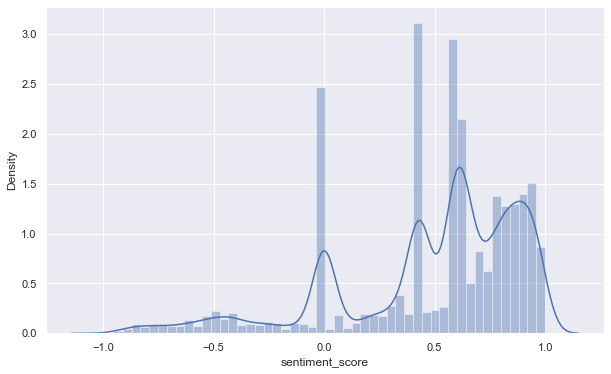

In [68]:
# Checking the distribution of reviews 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['sentiment_score'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_score'>

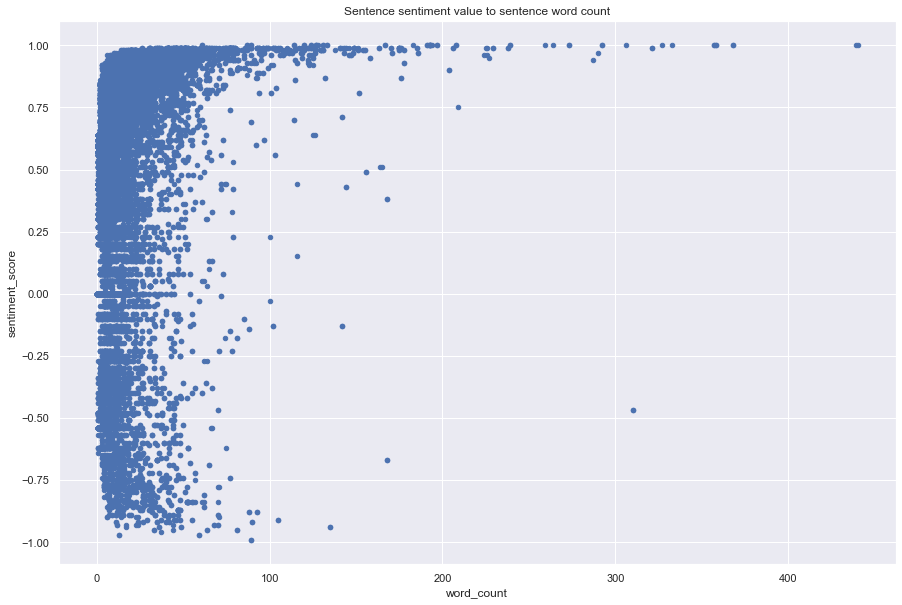

In [69]:
df.plot.scatter(x='word_count', y='sentiment_score', figsize=(15,10), title='Sentence sentiment value to sentence word count')

In [70]:
# This function will return sentiment category based on values in sentiment_value column

def sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentiment_score'] < 0:
        val = 'Negative'
    elif row['sentiment_score'] == 0: 
        val = 'Neutral'
    elif row['sentiment_score'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [74]:
#Applying the function in our new column
df['sentiment_category'] = df.apply(sentiment_cat, axis=1)
df.head()

,Ratings,Reviews,label,pre_process,sentiment_score,word_count,sentiment_category
0,5,Big billion day makes this phone even more val...,1,big billion day make phone even valuable,0.48,7,Positive
1,5,Every thing is fine n more then expected...,1,every thing fine n expected,0.20,5,Positive
2,2,Has many drawbacks. Apps developed for iPhone ...,0,many drawback apps developed iphone indian com...,-0.03,59,Negative
3,5,The phone was in superb condition... im lovin ...,1,phone superb condition im lovin product,0.62,6,Positive
4,5,Great Product.,1,great product,0.62,2,Positive


In [75]:
df['sentiment_category'].value_counts()

Positive    28961
Neutral      3467
Negative     3257
Name: sentiment_category, dtype: int64

In [76]:
# Maximum sentiment value
df['sentiment_score'].max()

1.0

In [82]:
# review which is having max sentiment value
df[df['sentiment_score']==1.0]

,Ratings,Reviews,label,pre_process,sentiment_score,word_count,sentiment_category
564,5,Recently i bought iphone 4s. Thank to flipkart...,1,recently bought iphone thank flipkart amazing ...,1.0,87,Positive
890,5,Design\n \n\n This is the best looking iPhon...,1,design best looking iphone yet mind first ante...,1.0,292,Positive
1531,5,iphone 4s was launched at 7 PM IST on October ...,1,iphone launched pm ist october india received ...,1.0,131,Positive
1559,5,I had pre-ordered and received iphone 4s 32 gb...,1,preordered received iphone gb black fan apple ...,1.0,167,Positive
2276,5,Some' Features ( There is a lot more which you...,1,feature lot experience smoothest user interfac...,1.0,439,Positive
2771,5,Waited so long to get my hands on Black versio...,1,waited long get hand black version due shortag...,1.0,239,Positive
2816,5,I'm giving this review after 1.5 months using ...,1,giving review month using could say phone want...,1.0,114,Positive
3207,5,"Hi all,\n\nI am writing this review after usin...",1,hi writing review using phone day trust guy wa...,1.0,197,Positive
3787,5,Recently i bought Iphone 4s. Thank to flipkart...,1,recently bought iphone thank flipkart amazing ...,1.0,87,Positive
4519,5,I previously had Iphone 4s and am pretty happy...,1,previously iphone pretty happy new iphone list...,1.0,357,Positive


In [78]:
# minimum sentiment value
df['sentiment_score'].min()

-0.99

In [79]:
# review which is having min sentiment value
df[df['sentiment_score']==-0.99]

,Ratings,Reviews,label,pre_process,sentiment_score,word_count,sentiment_category
11423,1,I got my Iphone 4s + the next day of my purcha...,0,got iphone next day purchase immediately using...,-0.99,89,Negative
21585,1,I got my iphone 4s the next day of my purchase...,0,got iphone next day purchase immediately using...,-0.99,89,Negative


In [80]:
# Sentiment score of the whole review
df['sentiment_score'].describe()

count    35685.000000
mean         0.491712
std          0.413947
min         -0.990000
25%          0.360000
50%          0.600000
75%          0.810000
max          1.000000
Name: sentiment_score, dtype: float64